# FIFA 19 complete player dataset

All data was load from : https://www.kaggle.com/karangadiya/fifa19
        
**About data**

data.csv includes lastest edition FIFA 2019 players attributes like :
* Age 
* Nationality 
* Overall 
* Potential 
* Club 
* Value 
* Wage 
* Preferred Foot 
* International Reputation 
* Weak Foot 
* Skill Moves 
* Work Rate 
* Position 
* Jersey Number 
* Joined 
* Loaned From 
* Contract Valid Until 
* Height 
* Weight 
* LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB 
* Crossing 
* Finishing 
* Heading 
* Accuracy 
* ShortPassing 
* Volleys 
* Dribbling 
* Curve 
* FKAccuracy 
* LongPassing 
* BallControl 
* Acceleration 
* SprintSpeed 
* Agility 
* Reactions 
* Balance 
* ShotPower 
* Jumping 
* Stamina 
* Strength 
* LongShots 
* Aggression 
* Interceptions 
* Positioning 
* Vision 
* Penalties 
* Composure 
* Marking 
* StandingTackle 
* SlidingTackle 
* GKDiving 
* GKHandling 
* GKKicking 
* GKPositioning 
* GKReflexes 
* Release Clause

In [1]:
# to get started, import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read file and create a data frame
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Best Players

Figure out the best players in overall rating per position in Fifa 2019.

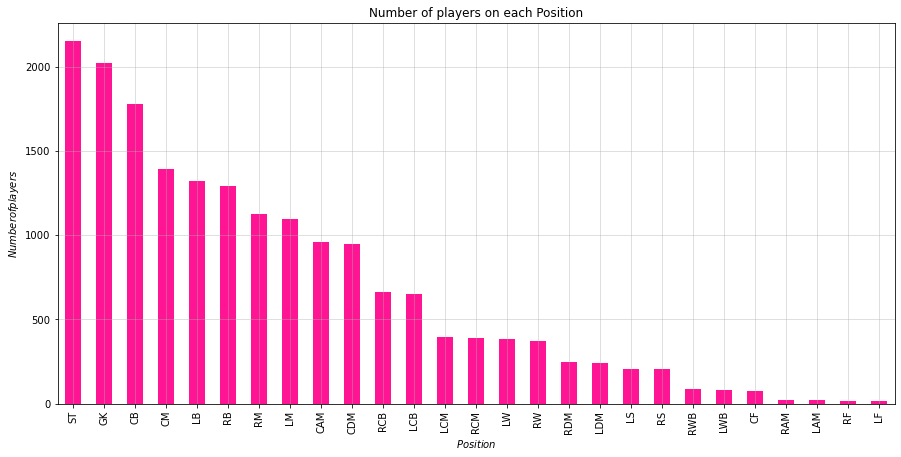

In [3]:
# let's plot the dependence of the number of players for each position 
df.Position.value_counts().plot(kind="bar", xlabel="$Position$", ylabel="$Number of players$", 
                                title="Number of players on each Position", figsize=(15, 7), color='deeppink');
plt.grid(linestyle='-', alpha=0.5);

In [4]:
# check nan values in label "Position" and drop them if exists
df_cut = df
if df.Position.isna().sum():
    df_cut = df.dropna(subset=["Position"])
df_cut = df_cut.reset_index(drop=True)
print(f"Number of nan values in label \"Position\" = {df_cut.Position.isna().sum()}")

Number of nan values in label "Position" = 0


In [5]:
# create a dictionary with key=position and value=tuple of player's name and his rating
dict_position_player = {}
for i in range(len(df_cut)):
    # get current player name, position and rating
    name = df_cut.loc[i].Name
    position = df_cut.loc[i].Position
    rating = df_cut.loc[i].Overall
    # add a pair key, value in dictionary
    if position not in dict_position_player:
        dict_position_player[position] = [(name, rating)]
    else:
        dict_position_player[position].append((name, rating))

In [6]:
# create a function to find best playes on current position
def find_best_playes_by_position(position, dict_position_player):
    name = dict_position_player[position][0][0]
    print(f"The best player on poisiton {position} is {name}")
    
for pos in dict_position_player.keys():
    find_best_playes_by_position(pos, dict_position_player)

The best player on poisiton RF is L. Messi
The best player on poisiton ST is Cristiano Ronaldo
The best player on poisiton LW is Neymar Jr
The best player on poisiton GK is De Gea
The best player on poisiton RCM is K. De Bruyne
The best player on poisiton LF is E. Hazard
The best player on poisiton RS is L. Suárez
The best player on poisiton RCB is Sergio Ramos
The best player on poisiton LCM is T. Kroos
The best player on poisiton CB is D. Godín
The best player on poisiton LDM is N. Kanté
The best player on poisiton CAM is A. Griezmann
The best player on poisiton CDM is Sergio Busquets
The best player on poisiton LS is E. Cavani
The best player on poisiton LCB is G. Chiellini
The best player on poisiton RM is K. Mbappé
The best player on poisiton LAM is J. Rodríguez
The best player on poisiton LM is P. Aubameyang
The best player on poisiton LB is Marcelo
The best player on poisiton RDM is P. Pogba
The best player on poisiton RW is Bernardo Silva
The best player on poisiton CM is Thiag

In [7]:
# create data frame with 5 the best player's and them rating
df_pos_rating = pd.DataFrame(index = np.arange(5))
for key, value in dict_position_player.items():
    df_pos_rating = df_pos_rating.join(pd.DataFrame(value[:5], columns=[key, "rating" + key], index = np.arange(5)))
df_pos_rating

,RF,ratingRF,ST,ratingST,LW,ratingLW,GK,ratingGK,RCM,ratingRCM,...,RB,ratingRB,RAM,ratingRAM,CF,ratingCF,RWB,ratingRWB,LWB,ratingLWB
0,L. Messi,94,Cristiano Ronaldo,94,Neymar Jr,92,De Gea,91,K. De Bruyne,91,...,Azpilicueta,86,J. Cuadrado,84,Luis Alberto,82,M. Ginter,80,N. Schulz,80
1,D. Mertens,87,R. Lewandowski,90,L. Insigne,88,J. Oblak,90,L. Modrić,91,...,Carvajal,84,H. Ziyech,83,S. Giovinco,82,P. Kadeřábek,80,Granell,79
2,D. Valeri,80,H. Kane,89,Isco,88,M. ter Stegen,89,I. Rakitić,87,...,K. Walker,84,Allan Bardinho,75,A. Milik,81,S. Coleman,80,Jonny,79
3,L. Podolski,78,S. Agüero,89,Coutinho,88,T. Courtois,89,J. Kimmich,85,...,Sergi Roberto,83,Jacson Zonta,74,L. Stindl,81,D. Caligiuri,79,J. Hector,79
4,C. Ciano,75,G. Bale,88,L. Sané,86,M. Neuer,89,Saúl,85,...,L. Bender,83,Sebas Couteira,74,Raffael,81,Pablo Maffeo,78,J. Mojica,78


In [8]:
# create a function to plot 5 the best players on every position
def ploting(position):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set(title="5 the best players on " + position, xlabel="$Rating$")
    ax.barh(df_pos_rating[position][::-1], df_pos_rating["rating" + position][::-1], color='deeppink')
    plt.grid(linestyle='--', alpha=0.5)

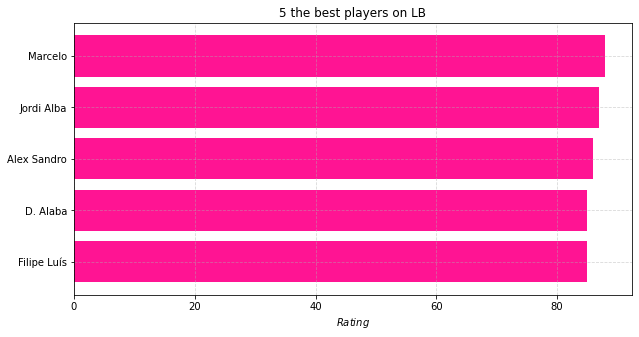

In [9]:
# create a list with all positions
positions = list(set(df_cut.Position))
# choose a random position for plotting
curr_pos = positions[np.random.randint(0, len(positions)-1)]
# plot 5 the best players on current position
ploting(curr_pos)

### Total number of right foot and left foot players

Figure out the total number of right foot and left foot players in Fifa 2019.

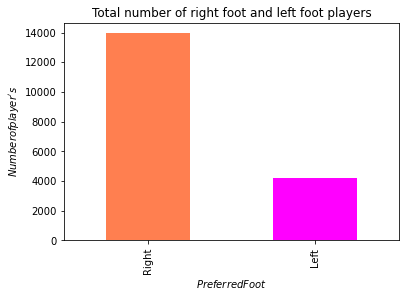

In [10]:
df["Preferred Foot"].value_counts().plot(kind="bar", xlabel="$Preferred Foot$", ylabel="$Number of player's$",
                                        title="Total number of right foot and left foot players", color=["coral", "fuchsia"]);

### Players Wages

Discover how many players have a wage which is in the range 100k-500k.

In [11]:
# copy the source df
df_wages = df
# convert Wage column into int format
df_wages["Wage"] = df_wages["Wage"].str.replace('€', '')
df_wages["Wage"] = df_wages["Wage"].str.replace('K', '000').astype(int)

In [12]:
# get all players which wage in the range 100k-500k
players_wages_obj = df_wages.Name[(100000 <= df_wages["Wage"]) & (df_wages["Wage"] <= 500000)]
print(f"Number of player's who have a wage in the range 100k-500k = {len(players_wages_obj)}")

Number of player's who have a wage in the range 100k-500k = 187


In [13]:
# create a dictionary with key=player and value=wage
players_wages_dict={}
for i in players_wages_obj.index:
    name = df["Name"][i]
    wage = df["Wage"][i]
    players_wages_dict[name] = wage
# sort a dictionary by wage
players_wages_dict = [(key, players_wages_dict[key]) for key in sorted(players_wages_dict, key=players_wages_dict.get, reverse=True)]

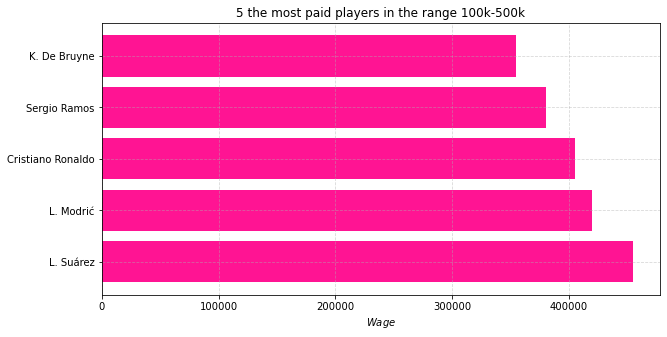

In [14]:
# create a data frame with 5 the most paid players from the current range
df_player_wage = pd.DataFrame(players_wages_dict[:5], columns=["Player", "Wage"])
fig, ax = plt.subplots(figsize=(10, 5))
ax.set(title="5 the most paid players in the range 100k-500k", xlabel="$Wage$")
ax.barh(df_player_wage["Player"], df_player_wage["Wage"], color='deeppink')
plt.grid(linestyle='--', alpha=0.5);

### Distribution of players nationalities

Display the distribution of the players nationalities on a histogram for Fifa 2019.

In [15]:
# create a data frame with a number of players in each country (by nationality)
df_nation = df.Nationality.value_counts().reset_index()
df_nation.columns = ["Country", "Number of players"]
df_nation.head()

,Country,Number of players
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914


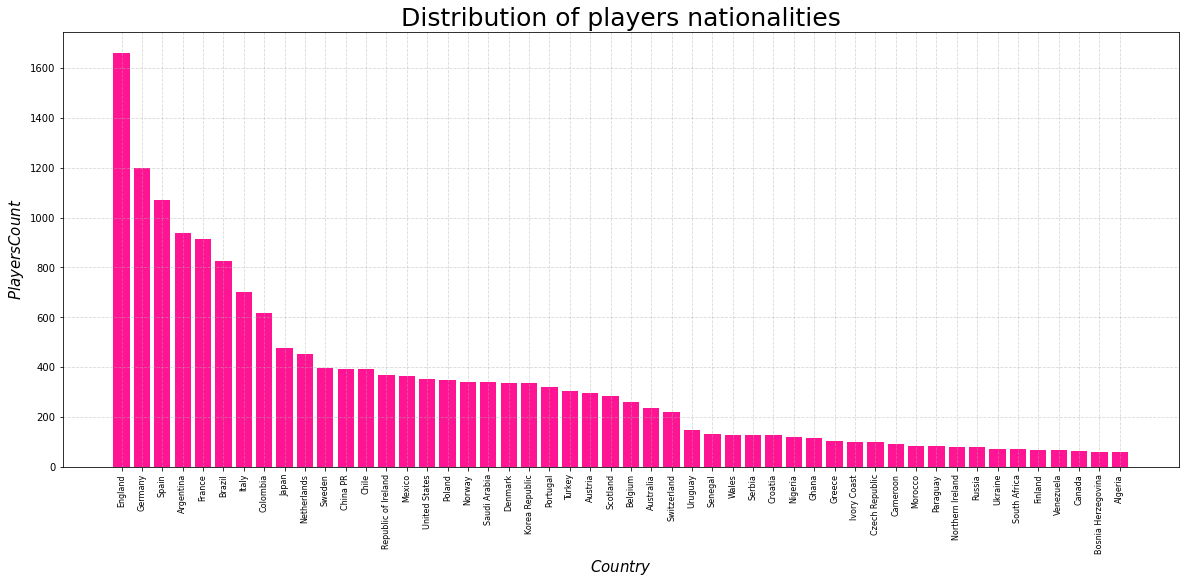

In [16]:
# plot first 50 countries in distribution of players nationalities
plt.figure(figsize=(20,8))
plt.bar(df_nation["Country"][:50], df_nation["Number of players"][:50], color='deeppink')
plt.xticks(rotation='vertical', size=8)
plt.title('Distribution of players nationalities', size=25)
plt.xlabel('$Country$', size=15)
plt.ylabel('$Players Count$', size=15) 
plt.grid(linestyle='--', alpha=0.5)
plt.show;

### Average rating of players

Figure out the average rating of players per country in fifa 2019. After this analysis, you can also come up with a list of the countries that have the best players.

In [17]:
# create a list with average ratings by country
average_ratings = []
# loop for each country
for country in set(df["Nationality"]):
    # calculate the average rating of players per country
    average_rating = df["Overall"][df["Nationality"] == country].median()
    # form a list with average ratings
    average_ratings.append(average_rating)
# create a data frame with average ratings  by country
df_average_rating = pd.DataFrame(average_ratings, list(set(df["Nationality"]))).reset_index()
df_average_rating.columns = ["Country", "Average rating"]
# sort data frame by average rating
df_average_rating.sort_values(by="Average rating", ascending=False, inplace=True)
# 5 countries that have the best players rating
df_average_rating.head()

,Country,Average rating
14,United Arab Emirates,77.0
49,Oman,72.0
75,Dominican Republic,72.0
96,São Tomé & Príncipe,72.0
40,Mozambique,71.5


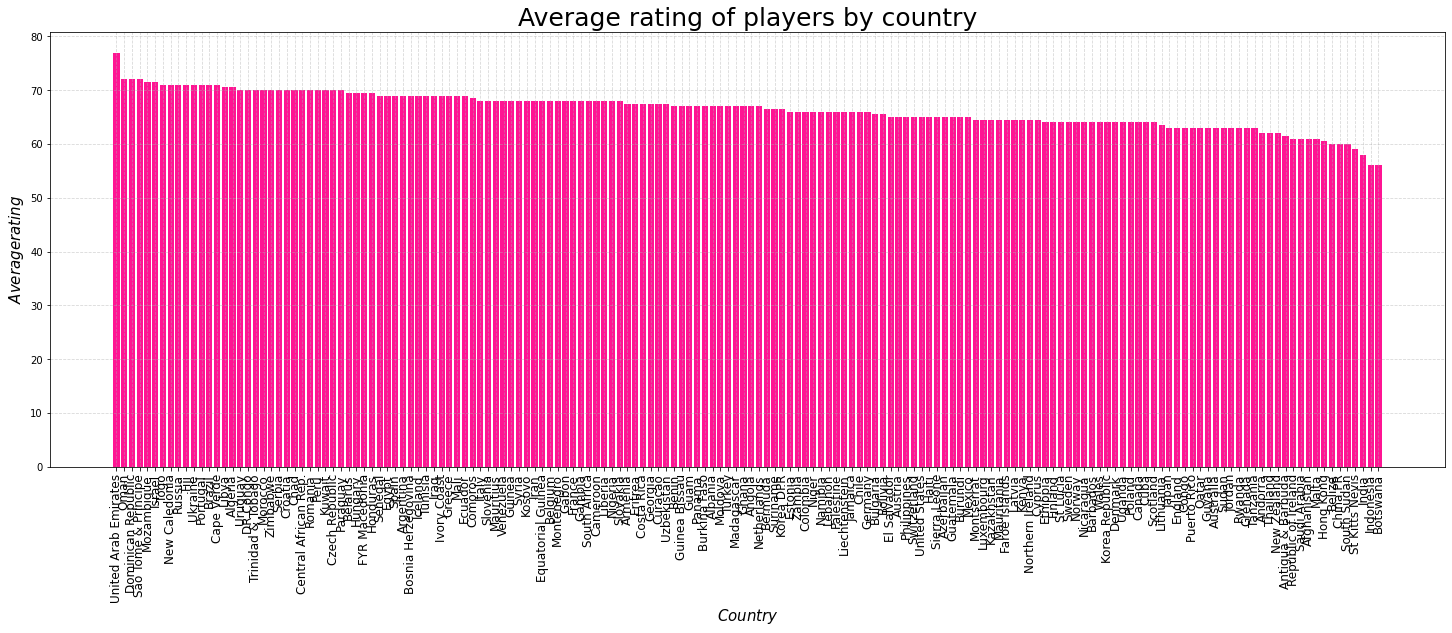

In [18]:
# plot average rating of players by country
plt.figure(figsize=(25,8))
plt.bar(df_average_rating["Country"], df_average_rating["Average rating"], color='deeppink')
plt.xticks(rotation='vertical', size=12)
plt.title('Average rating of players by country', size=25)
plt.xlabel('$Country$', size=15)
plt.ylabel('$Average rating$', size=15)    
plt.grid(linestyle='--', alpha=0.5)
plt.show;

In [19]:
# create a data frame of the countries that have the best players
df_ratings = df[["Nationality", "Overall"]]
df_ratings = df_ratings.groupby(["Nationality"]).agg(['mean', 'count'])
df_ratings.columns=["Overall", "Count"]
df_ratings[df_ratings.Count>100].sort_values(by="Overall", ascending=False).head()

,Overall,Count
Nationality,,
Portugal,71.344720,322
Brazil,71.251511,827
Uruguay,70.429530,149
Serbia,69.928571,126
Spain,69.698694,1072


### Distribution of the positions of players

Display the distribution of the positions of all players in Fifa 2019 on a histogram.

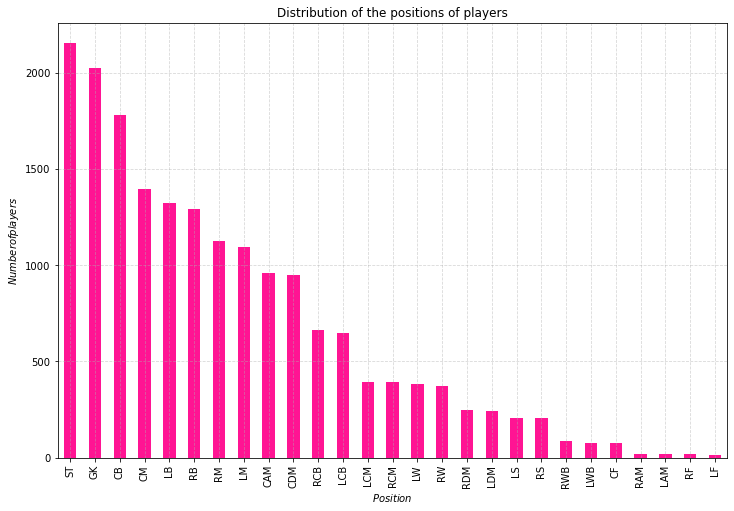

In [20]:
df["Position"].value_counts().plot(kind="bar", xlabel="$Position$", ylabel="$Number of players$", 
                                  title="Distribution of the positions of players", figsize=(12, 8), color='deeppink');
plt.grid(linestyle='--', alpha=0.5);

### Age Distribution

Figure out the age distribution of players in Fifa 2019.

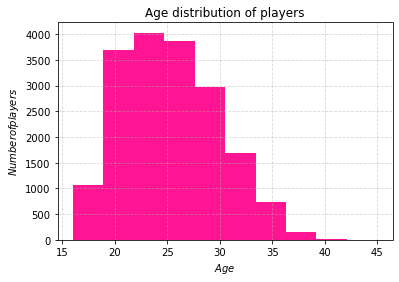

In [21]:
plt.hist(df["Age"], color='deeppink')
plt.xlabel("$Age$");
plt.ylabel("$Number of players$");
plt.title("Age distribution of players");
plt.grid(linestyle='--', alpha=0.5);
plt.show();

### Distribution of players values

Figure out the distribution of players values in Fifa 2019. The results should be in the form of a histogram.

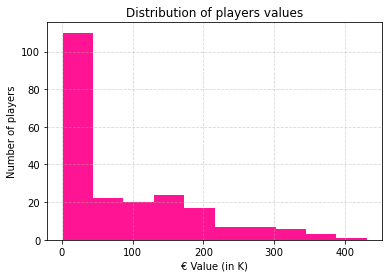

In [22]:
plt.hist(df["Value"].value_counts(), color='deeppink')
plt.xlabel("€ Value (in K)");
plt.ylabel("Number of players");
plt.title("Distribution of players values");
plt.grid(linestyle='--', alpha=0.5);
plt.show();

### Age distribution per Value

Figure out the age distribution of players per values in Fifa 2019. The results should be in the form of a histogram.

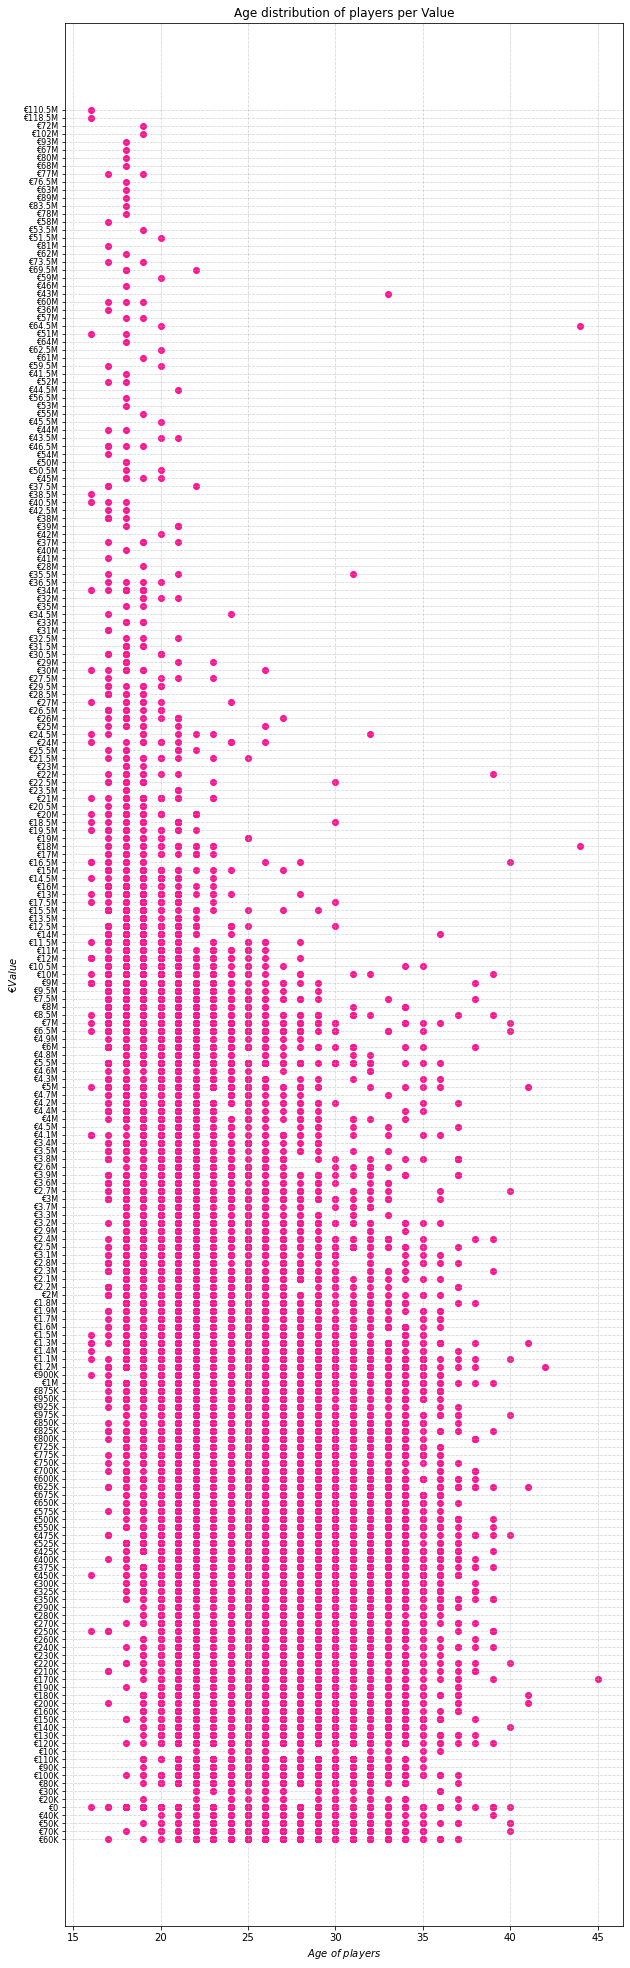

In [23]:
fig, ax = plt.subplots(figsize=(10, 35))
ax.scatter(df["Age"], df["Value"][::-1], color='deeppink')
plt.xlabel("$Age$ $of$ $players$");
plt.ylabel("$€ Value$");
plt.title("Age distribution of players per Value");
plt.yticks(rotation='horizontal', size=8);
plt.grid(linestyle='--', alpha=0.5);
plt.show();

### Top 10 Players according to value

Figure out the top 10 players in Fifa 2019 according to their value.

In [24]:
# create a data frame with players name and their values
df_top_val = df[["Name", "Value"]]
# convert string values to numerical values to compare them
df_top_val["Value"] = df_top_val["Value"].str.replace('[€\.\,]', '')
df_top_val["Value"] = df_top_val["Value"].str.replace('M', '000000')
df_top_val["Value"] = df_top_val["Value"].str.replace('K', '000')
df_top_val["Value"] = df_top_val["Value"].astype(int)

In [25]:
# sort data frame from the biggest value to the lowest and choose top 10
df_top_val = df_top_val.sort_values(by=["Value"], ascending=False)[:10]
df_top_val

,Name,Value
2,Neymar Jr,1185000000
0,L. Messi,1105000000
16,H. Kane,835000000
11,T. Kroos,765000000
31,C. Eriksen,735000000
30,Isco,735000000
32,Coutinho,695000000
28,J. Rodríguez,695000000
26,M. Salah,695000000
23,S. Agüero,645000000


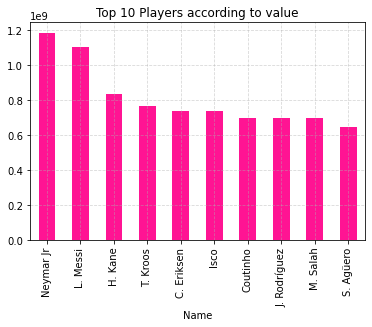

In [26]:
# plot top 10 Players according to value
df_top_val.plot(kind="bar", x="Name", y="Value", title="Top 10 Players according to value", legend=False, color='deeppink');
plt.grid(linestyle='--', alpha=0.5);

### Top 10 potential players

Figure out the top 10 potential players in Fifa 2019. This can be done by using the Potential attribute.

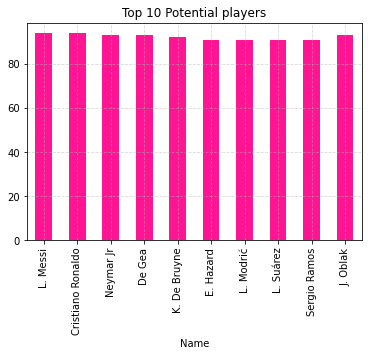

In [27]:
df[:10].plot(kind="bar", x="Name", y="Potential", title="Top 10 Potential players", legend=False, color='deeppink');
plt.grid(linestyle='--', alpha=0.5);

### Most exspensive clubs by players value

Figure out the top 10 most exspensive clubs by players value in Fifa 2019.

In [28]:
df_by_club = df
# convert string values to numerical values to compare them
df_by_club["Value"] = df_by_club["Value"].str.replace('[€\.\,]', '')
df_by_club["Value"] = df_by_club["Value"].str.replace('M', '000000')
df_by_club["Value"] = df_by_club["Value"].str.replace('K', '000')
df_by_club["Value"] = df_by_club["Value"].astype(int)

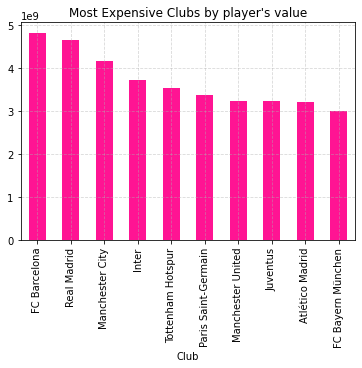

In [29]:
df_by_club = df.groupby(by="Club").Value.sum().reset_index().sort_values(by="Value", ascending=False)
df_by_club[:10].plot(kind="bar", x="Club", y="Value", title="Most Expensive Clubs by player's value", legend=False, color='deeppink');
plt.grid(linestyle='--', alpha=0.5);

### Best clubs by players overall

Figure out the top 10 best clubs by players overall in Fifa 2019.

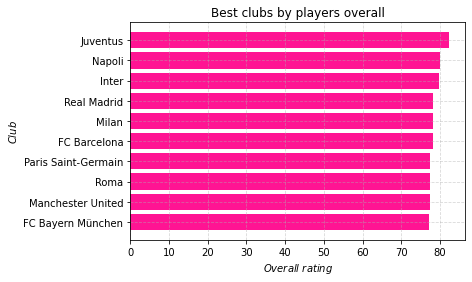

In [30]:
df_best_clubs = df.groupby(by="Club").Overall.mean().reset_index().sort_values(by="Overall", ascending=False)
df_best_clubs10 = df_best_clubs[:10].sort_values(by="Overall")
plt.barh(df_best_clubs10["Club"], df_best_clubs10["Overall"], color='deeppink');
plt.grid(linestyle='--', alpha=0.5);
plt.xlabel("$Overall$ $rating$")
plt.ylabel("$Club$")
plt.title("Best clubs by players overall")
plt.show;

### Best clubs by young players overall

Figure out the top 10 best clubs by young players overall (age less then 28) in Fifa 2019.

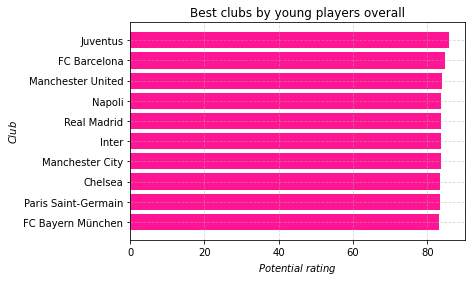

In [31]:
df_best_young_clubs = df.loc[df["Age"] < 28].groupby(by="Club").Potential.mean().reset_index().sort_values(by="Potential", ascending=False)
df_best_young_clubs10 = df_best_young_clubs[:10].sort_values(by="Potential")
plt.barh(df_best_young_clubs10["Club"], df_best_young_clubs10["Potential"], color='deeppink');
plt.grid(linestyle='--', alpha=0.5);
plt.xlabel("$Potential$ $rating$")
plt.ylabel("$Club$")
plt.title("Best clubs by young players overall")
plt.show;

### Number of players in countries

Display the number of players in in each country for Fifa 2019.

In [32]:
# create a data frame with countries and number of players in each country
df_by_country = df.groupby(by="Nationality").Name.count().reset_index()
df_by_country.columns = ["Country", "Number of players"]
# sort from the biggest number of players to the least
df_by_country.sort_values(by="Number of players", ascending=False, inplace=True)
df_by_country = df_by_country.reset_index()
# add a column which means number of players in each country in %
df_by_country["num"] = (df_by_country["Number of players"]/len(df_by_country)).astype(float)
# get the top 10 countries
df_by_country10 = df_by_country[:10]
# other contries
df_by_country10 = df_by_country10.drop("index", axis=1)
df_by_country10.loc[10] = ["Others", df_by_country[11:]["Number of players"].sum(), 
                           df_by_country[11:]["num"].sum()]
# convert to str
for i in range(len(df_by_country10["num"])):
    num = df_by_country10["num"].loc[i]
    df_by_country10["num"].loc[i] = f"{num:.2f}%"
df_by_country10

C:\Users\user\Desktop\fifa19\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Country,Number of players,num
0,England,1662,10.13%
1,Germany,1198,7.30%
2,Spain,1072,6.54%
3,Argentina,937,5.71%
4,France,914,5.57%
5,Brazil,827,5.04%
6,Italy,702,4.28%
7,Colombia,618,3.77%
8,Japan,478,2.91%
9,Netherlands,453,2.76%


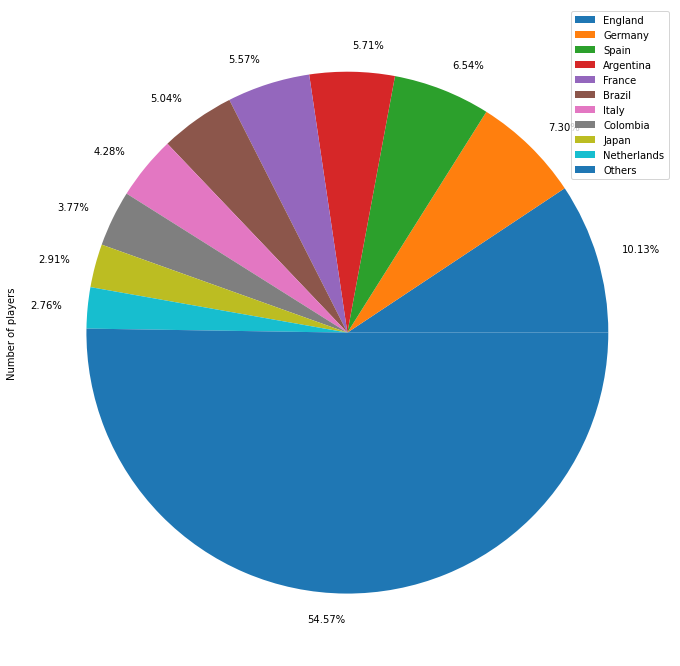

In [33]:
df_by_country10.index = df_by_country10["num"]
df_by_country10.plot.pie(y='Number of players', figsize=(12, 12));
plt.legend(df_by_country10["Country"]);